In [1]:
import os
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import datetime
import pickle

# Read the Data

In [2]:
notas = pd.read_csv('notas.csv', sep=';')

In [3]:
df_opinioes = pd.read_json('opinioes.json', encoding = 'utf-8')

# Create notas DF

In [4]:
notas.head()

,ID,quesito,nota
0,e2b9dc08,Estilo,7
1,e2b9dc08,Acabamento,5
2,e2b9dc08,Posição de dirigir,7
3,e2b9dc08,Instrumentos,10
4,e2b9dc08,Interior,5


In [5]:
columns=['ID', 'Estilo', 'Acabamento', 'Posição de dirigir', 'Instrumentos', 'Interior', 
         'Porta-malas', 'Desempenho', 'Motor', 'Câmbio', 'Freios', 'Suspensão', 'Consumo', 'Estabilidade', 
         'Custo-Benefício', 'Recomendação']

df_notas = pd.DataFrame(columns=columns)

list = []
for index, row in notas.iterrows():
    if index % (len(columns) - 1) == 0:
        list.append(row['ID'])
    list.append(row['nota'])
    if index % (len(columns) - 1) == len(columns) - 2:
        pd.concat([df_notas, pd.Series(list, index=columns)])
        s = pd.Series(list, index=columns)
        df_notas = df_notas.append(s, ignore_index=True)
        list = []
        

In [6]:
df_notas.head()

,ID,Estilo,Acabamento,Posição de dirigir,Instrumentos,Interior,Porta-malas,Desempenho,Motor,Câmbio,Freios,Suspensão,Consumo,Estabilidade,Custo-Benefício,Recomendação
0,e2b9dc08,7,5,7,10,5,5,10,10,10,10,10,10,10,10,10
1,3b9dcf63,10,8,8,8,6,6,8,10,10,10,8,10,8,10,10
2,9f62a709,10,7,8,7,7,8,7,10,7,10,9,10,8,10,10
3,0e6c8d29,8,4,8,10,7,7,10,10,8,9,8,10,10,9,10
4,3c958631,7,6,5,7,6,4,8,9,7,7,6,8,9,8,9


# Set Columns Opiniões DF

In [7]:
df_opinioes.columns=['ID', 'Título', 'Carro', 'Dono','Tempo de Uso', 'Prós', 'Contras', 'Defeitos', 'Opinião', 'Data']

# Join datasets

In [8]:
df = df_opinioes.set_index('ID').join(df_notas.set_index('ID'))

In [9]:
df.iloc[0]

Título                             "MELHOR POPULAR DO MERCADO ATÉ 2012"
Carro                                  Chevrolet Celta LT 1.0 2011/2012
Dono                                                 João - Brasília DF
Tempo de Uso          Dono há 6 anos - 35.200 kmCarro anterior: Fiat...
Prós                  Prós:ECONOMIA DE COMBUSTÍVEL, PEÇAS BARATAS, R...
Contras               Contras:UM POUCO BAIXO.. AS VEZES QUANDO ESTÁ ...
Defeitos                                   Defeitos apresentados:NENHUM
Opinião               Opinião Geral:O CARRO É 10 ESTOU COM ELE A 7 A...
Data                                                09/03/2018 17:40:00
Estilo                                                                7
Acabamento                                                            5
Posição de dirigir                                                    7
Instrumentos                                                         10
Interior                                                        

# Data Overview

In [10]:
print ('df shape', df.shape)

df shape (5329, 24)


In [11]:
df.head()

,Título,Carro,Dono,Tempo de Uso,Prós,Contras,Defeitos,Opinião,Data,Estilo,...,Porta-malas,Desempenho,Motor,Câmbio,Freios,Suspensão,Consumo,Estabilidade,Custo-Benefício,Recomendação
ID,,,,,,,,,,,,,,,,,,,,,
e2b9dc08,"""MELHOR POPULAR DO MERCADO ATÉ 2012""",Chevrolet Celta LT 1.0 2011/2012,João - Brasília DF,Dono há 6 anos - 35.200 kmCarro anterior: Fiat...,"Prós:ECONOMIA DE COMBUSTÍVEL, PEÇAS BARATAS, R...",Contras:UM POUCO BAIXO.. AS VEZES QUANDO ESTÁ ...,Defeitos apresentados:NENHUM,Opinião Geral:O CARRO É 10 ESTOU COM ELE A 7 A...,09/03/2018 17:40:00,7,...,5,10,10,10,10,10,10,10,10,10
3b9dcf63,"""Ótimo carro a um custo baixo!""",Chevrolet Celta LT 1.0 2015/2015,Hugo - São Pedro SP,Dono há 3 anos - 59.000 kmCarro anterior: Chev...,"Prós:Motor potente pra um carro 1.0, sem deixa...",Contras:Saiu de linha,Defeitos apresentados:Nenhum,Opinião Geral:Este é o segundo celta que compr...,02/03/2018 21:27:00,10,...,6,8,10,10,10,8,10,8,10,10
9f62a709,"""Excelente!""",Chevrolet Celta Life 1.0 2004/2005,Ivan - Salvador BA,Dono há menos de 1 ano - 80.000 kmCarro anteri...,"Prós:Tamanho[cabe em qualquer vaga],excelente ...",Contras:Nao tem. Levando em conta que o carro ...,Defeitos apresentados:Até agora nenhum. Já fiz...,"Opinião Geral:Recomendo: carro valente, relati...",27/02/2018 23:14:00,10,...,8,7,10,7,10,9,10,8,10,10
0e6c8d29,"""Rapido e economico""",Chevrolet Celta LT 1.0 2012/2013,Gabriel - Porto Alegre RS,Dono há 3 anos - 89.000 kmCarro anterior: Volk...,"Prós:Carro extremamente confiavel, so fazer a ...",Contras:Acabamento do carro é RUSTICO bem mal ...,Defeitos apresentados:nada o carro é valente,Opinião Geral:Ja passei ate por trilhas onde c...,18/02/2018 12:32:00,8,...,7,10,10,8,9,8,10,10,9,10
3c958631,"""Carro honesto.""",Chevrolet Celta Life 1.0 2007/2008,Deleon - Brasília DF,Dono há 7 anos - 150.247 kmCarro anterior: Vol...,"Prós:Desempenho[para 1.0], manutenção barata, ...","Contras:Meio duro, pouco espaço. Motor grita m...",Defeitos apresentados:Bomba dágua.,Opinião Geral:Carro honesto. Para primeiro vei...,04/02/2018 21:19:00,7,...,4,8,9,7,7,6,8,9,8,9


# Dataset cleaning

In [12]:
# Number of NaNs for each object
df.isnull().sum(axis=1).head(10)

ID
e2b9dc08    0
3b9dcf63    0
9f62a709    0
0e6c8d29    0
3c958631    0
852a54b4    0
dc686d42    0
f8a6d3f6    0
8cd5fbf4    0
dc655dbb    0
dtype: int64

In [13]:
# Number of NaNs for each column
df.isnull().sum(axis=0).head(10)

Título          0
Carro           0
Dono            0
Tempo de Uso    0
Prós            0
Contras         0
Defeitos        0
Opinião         0
Data            0
Estilo          0
dtype: int64

In [14]:
df.shape

(5329, 24)

In [15]:
df['ID'] = df.index

In [16]:
nunique = df.nunique(dropna=False)
nunique

Título                4308
Carro                 1340
Dono                  4386
Tempo de Uso          3154
Prós                  5266
Contras               5247
Defeitos              4548
Opinião               5282
Data                  5326
Estilo                  11
Acabamento              11
Posição de dirigir      11
Instrumentos            11
Interior                11
Porta-malas             11
Desempenho              11
Motor                   11
Câmbio                  11
Freios                  11
Suspensão               11
Consumo                 11
Estabilidade            11
Custo-Benefício         11
Recomendação            11
ID                    5329
dtype: int64

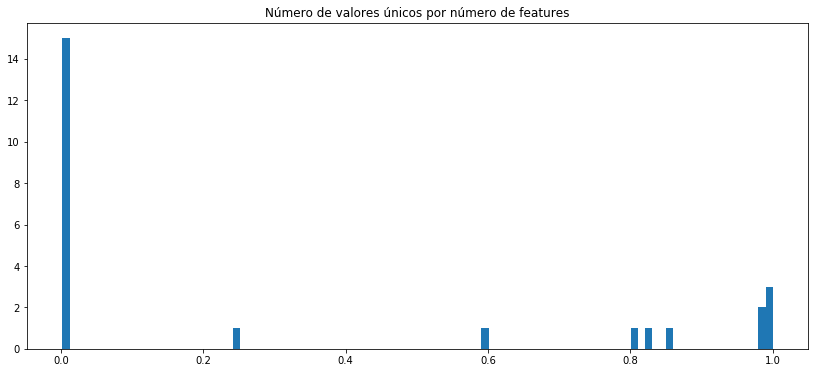

In [17]:
plt.figure(figsize=(14,6))
plt.title('Número de valores únicos por número de features')
_ = plt.hist(nunique.astype(float)/df.shape[0], bins=100)


# Save and Load

In [18]:
df.to_pickle('df_backup_1.p')


In [107]:
df = pd.read_pickle('df_backup_1.p')

# Feature Engineering


In [108]:
df.describe()

,Título,Carro,Dono,Tempo de Uso,Prós,Contras,Defeitos,Opinião,Data,Estilo,...,Desempenho,Motor,Câmbio,Freios,Suspensão,Consumo,Estabilidade,Custo-Benefício,Recomendação,ID
count,5329,5329,5329,5329,5329,5329,5329,5329,5329,5329,...,5329,5329,5329,5329,5329,5329,5329,5329,5329,5329
unique,4308,1340,4386,3154,5266,5247,4548,5282,5326,11,...,11,11,11,11,11,11,11,11,11,5329
top,"""Bom carro""",Volkswagen Gol G5 1.0 2009/2009,Felipe - São Paulo SP,Dono há menos de 1 ano,Prós:nenhum,Contras:Nenhum,Defeitos apresentados:Nenhum,Opinião Geral:,23/08/2013 18:00:00,10,...,8,10,10,8,8,10,8,10,10,5ca8de65
freq,62,63,16,585,10,17,175,10,2,1517,...,1076,1229,1325,1303,1145,1122,1319,1151,1574,1


In [109]:
df.iloc[0]

Título                             "MELHOR POPULAR DO MERCADO ATÉ 2012"
Carro                                  Chevrolet Celta LT 1.0 2011/2012
Dono                                                 João - Brasília DF
Tempo de Uso          Dono há 6 anos - 35.200 kmCarro anterior: Fiat...
Prós                  Prós:ECONOMIA DE COMBUSTÍVEL, PEÇAS BARATAS, R...
Contras               Contras:UM POUCO BAIXO.. AS VEZES QUANDO ESTÁ ...
Defeitos                                   Defeitos apresentados:NENHUM
Opinião               Opinião Geral:O CARRO É 10 ESTOU COM ELE A 7 A...
Data                                                09/03/2018 17:40:00
Estilo                                                                7
Acabamento                                                            5
Posição de dirigir                                                    7
Instrumentos                                                         10
Interior                                                        

In [110]:
def get_carro_anterior(x):
    list = x.split('Carro anterior: ')
    if len(list) > 1:
        return list[1]
    else:
        return 'NaN'
    
df['Carro Anterior'] = df['Tempo de Uso'].apply(lambda x: get_carro_anterior(x))

In [111]:
df['Tempo de Uso'] = df['Tempo de Uso'].apply(lambda x: x.split('Carro anterior: ')[0])
df['Prós'] = df['Prós'].apply(lambda x: x.split('Prós:')[1])
df['Contras'] = df['Contras'].apply(lambda x: x.split('Contras:')[1])
df['Defeitos'] = df['Defeitos'].apply(lambda x: x.split('Defeitos apresentados:')[1])
df['Opinião'] = df['Opinião'].apply(lambda x: x.split('Opinião Geral:')[1])

In [112]:
media = []
for index, row in df.iterrows():
    soma = 0
    for feat in columns[1:]:
        soma += row[feat]
    media.append(soma/len(columns))
    
media = pd.Series(media)
df['Média'] = media.values

In [113]:
df['Quilometragem'] = df['Tempo de Uso'].apply(lambda x: x.split(' ')[-2])

In [114]:
def get_anos(x):
    if 'Dono há menos de' in x:
        return '0.5'
    else:
        return x.split(' ')[2]
df['Anos de Uso'] = df['Tempo de Uso'].apply(lambda x: get_anos(x))

In [115]:
df = df.drop('Tempo de Uso', axis=1)

In [116]:
def get_cidade(x):
    index1 = x.find('- ')
    index2 = x.rfind(' ')
    return x[index1 + 2:index2]

df['Cidade'] = df['Dono'].apply(lambda x: get_cidade(x))

In [117]:
df.head()

,Título,Carro,Dono,Prós,Contras,Defeitos,Opinião,Data,Estilo,Acabamento,...,Consumo,Estabilidade,Custo-Benefício,Recomendação,ID,Carro Anterior,Média,Quilometragem,Anos de Uso,Cidade
ID,,,,,,,,,,,,,,,,,,,,,
e2b9dc08,"""MELHOR POPULAR DO MERCADO ATÉ 2012""",Chevrolet Celta LT 1.0 2011/2012,João - Brasília DF,"ECONOMIA DE COMBUSTÍVEL, PEÇAS BARATAS, RESIST...",UM POUCO BAIXO.. AS VEZES QUANDO ESTÁ CARREGAD...,NENHUM,O CARRO É 10 ESTOU COM ELE A 7 ANOS E RODEI 35...,09/03/2018 17:40:00,7,5,...,10,10,10,10,e2b9dc08,Fiat Uno,8.0625,35.200,6,Brasília
3b9dcf63,"""Ótimo carro a um custo baixo!""",Chevrolet Celta LT 1.0 2015/2015,Hugo - São Pedro SP,"Motor potente pra um carro 1.0, sem deixar de ...",Saiu de linha,Nenhum,Este é o segundo celta que compro 0km e não me...,02/03/2018 21:27:00,10,8,...,10,8,10,10,3b9dcf63,Chevrolet Celta,8.1250,59.000,3,São Pedro
9f62a709,"""Excelente!""",Chevrolet Celta Life 1.0 2004/2005,Ivan - Salvador BA,"Tamanho[cabe em qualquer vaga],excelente para ...",Nao tem. Levando em conta que o carro foi feit...,Até agora nenhum. Já fiz algumas viagens e gra...,"Recomendo: carro valente, relativamente confor...",27/02/2018 23:14:00,10,7,...,10,8,10,10,9f62a709,Primeiro carro,8.0000,80.000,0.5,Salvador
0e6c8d29,"""Rapido e economico""",Chevrolet Celta LT 1.0 2012/2013,Gabriel - Porto Alegre RS,"Carro extremamente confiavel, so fazer a manut...","Acabamento do carro é RUSTICO bem mal feito, b...",nada o carro é valente,Ja passei ate por trilhas onde caminhonetes fi...,18/02/2018 12:32:00,8,4,...,10,10,9,10,0e6c8d29,Volkswagen Parati,8.0000,89.000,3,Porto Alegre
3c958631,"""Carro honesto.""",Chevrolet Celta Life 1.0 2007/2008,Deleon - Brasília DF,"Desempenho[para 1.0], manutenção barata, carro...","Meio duro, pouco espaço. Motor grita muito em ...",Bomba dágua.,"Carro honesto. Para primeiro veiculo, melhor q...",04/02/2018 21:19:00,7,6,...,8,9,8,9,3c958631,Volkswagen Passat,6.6250,150.247,7,Brasília


In [118]:
df['Estado'] = df['Dono'].apply(lambda x: x.split(' ')[-1])
df['Dono'] = df['Dono'].apply(lambda x: x.split(' ')[0])

In [119]:
df['Título'] = df['Título'].apply(lambda x: x.replace('\"',''))

In [120]:
df['Ano do Carro'] = df['Carro'].apply(lambda x: x.split(' ')[-1])

In [121]:
df['Ano Início'] = df['Ano do Carro'].apply(lambda x: x.split('/')[0])
df['Ano Final'] = df['Ano do Carro'].apply(lambda x: x.split('/')[-1])

In [122]:
df['Marca'] = df['Carro'].apply(lambda x: x.split(' ')[0])

### Find Gender

In [123]:
df_genders = pd.read_excel('Lista_de_nomes_2017_11.xlsx')
df_genders2 = pd.read_excel('nomes-2015.xlsx')

In [124]:
df_genders.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,GÉNERO,NOME,GÉNERO,NOME
1,Femininos,Aabirah,Masculinos,Aabaj
2,Femininos,Aaditi,Masculinos,Aagambir
3,Femininos,Aaira,Masculinos,Aahan
4,Femininos,Aaish,Masculinos,Aahil


In [125]:
df_genders2.columns = ['Sexo', 'Nome', 'Freq']
df_genders2.head()

,Sexo,Nome,Freq
0,F,Maria,5324.0
1,F,Leonor,1999.0
2,F,Matilde,1889.0
3,F,Beatriz,1268.0
4,F,Carolina,1228.0


In [126]:
df_genders.shape

(4312, 4)

In [127]:
def get_gender2(x):
    result = df_genders2[df_genders2['Nome'] == x]['Sexo']
    if len(result) > 0:
        return result.values[0]
    else:
        return 'NaN'

def get_gender(x):
    result = df_genders.isin([x])
    fem_column = 1
    masc_column = 3
    if result.sum(axis=0).iloc[fem_column] > 0:
        return 'F'
    elif result.sum(axis=0).iloc[masc_column] > 0:
        return 'M'
    else:
        return get_gender2(x)

In [128]:
df['Sexo'] = df['Dono'].apply(lambda x: get_gender(x))

In [129]:
df.groupby('Sexo').count() # 1191 NaN antes, agora 1156 kkkkkk não ajudou tanto assim

,Título,Carro,Dono,Prós,Contras,Defeitos,Opinião,Data,Estilo,Acabamento,...,Carro Anterior,Média,Quilometragem,Anos de Uso,Cidade,Estado,Ano do Carro,Ano Início,Ano Final,Marca
Sexo,,,,,,,,,,,,,,,,,,,,,
F,439,439,439,439,439,439,439,439,439,439,...,439,439,439,439,439,439,439,439,439,439
M,3734,3734,3734,3734,3734,3734,3734,3734,3734,3734,...,3734,3734,3734,3734,3734,3734,3734,3734,3734,3734
NaN,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,...,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156


### Find Region

In [130]:
regioes = {
'AM' : 'Norte',
'RR' : 'Norte',
'AP' : 'Norte',
'PA' : 'Norte',
'TO' : 'Norte',
'RO' : 'Norte',
'AC' : 'Norte',
'MA' : 'Nordeste',
'PI' : 'Nordeste',
'CE' : 'Nordeste',
'RN' : 'Nordeste',
'PE' : 'Nordeste',
'PB' : 'Nordeste',
'SE' : 'Nordeste',
'AL' : 'Nordeste',
'BA' : 'Nordeste',
'MT' : 'Centro-Oeste',
'MS' : 'Centro-Oeste',
'GO' : 'Centro-Oeste',
'DF' : 'Centro-Oeste',
'SP' : 'Sudeste',
'RJ' : 'Sudeste',
'ES' : 'Sudeste',
'MG' : 'Sudeste',
'PR' : 'Sul',
'RS' : 'Sul',
'SC' : 'Sul'
}

In [131]:
df['Região'] = df['Estado'].apply(lambda x: regioes[x])

In [132]:
df.iloc[0]

Título                               MELHOR POPULAR DO MERCADO ATÉ 2012
Carro                                  Chevrolet Celta LT 1.0 2011/2012
Dono                                                               João
Prós                  ECONOMIA DE COMBUSTÍVEL, PEÇAS BARATAS, RESIST...
Contras               UM POUCO BAIXO.. AS VEZES QUANDO ESTÁ CARREGAD...
Defeitos                                                         NENHUM
Opinião               O CARRO É 10 ESTOU COM ELE A 7 ANOS E RODEI 35...
Data                                                09/03/2018 17:40:00
Estilo                                                                7
Acabamento                                                            5
Posição de dirigir                                                    7
Instrumentos                                                         10
Interior                                                              5
Porta-malas                                                     

In [133]:
df['Data'] = pd.to_datetime(df['Data'], format = '%d/%m/%Y %H:%M:%S', errors = 'coerce')

df['Weekday'] = df['Data'].apply(lambda x: x.weekday())

In [134]:
df = df.apply(pd.to_numeric, errors='ignore')

In [135]:
capitais = {
'AM' : 'Manaus',
'RR' : 'Boa Vista',
'AP' : 'Macapá',
'PA' : 'Belém',
'TO' : 'Palmas',
'RO' : 'Porto Velho',
'AC' : 'Rio Branco',
'MA' : 'São Luís',
'PI' : 'Teresina',
'CE' : 'Fortaleza',
'RN' : 'Natal',
'PE' : 'Recife',
'PB' : 'João Pessoa',
'SE' : 'Aracaju',
'AL' : 'Maceió',
'BA' : 'Salvador',
'MT' : 'Cuiabá',
'MS' : 'Campo Grande',
'GO' : 'Goiânia',
'SP' : 'São Paulo',
'RJ' : 'Rio de Janeiro',
'ES' : 'Vitória',
'MG' : 'Belo Horizonte',
'PR' : 'Curitiba',
'RS' : 'Porto Alegre',
'SC' : 'Florianópolis',
'DF' : 'Brasília'
}

In [136]:
def get_is_capital(x):
    if x in capitais.values():
        return True
    else:
        return False
    

In [137]:
df['Capital'] = df['Cidade'].apply(lambda x: get_is_capital(x))

# Get population

In [138]:
df_populacao = pd.read_csv('Lista_de_cidade_populacao_2017.csv')

In [139]:
df_populacao.head()

,Posição,Código IBGE,Município,UF,População
0,1º,3550308,São Paulo,São Paulo,12106920
1,2º,3304557,Rio de Janeiro,Rio de Janeiro,6520266
2,3º,5300108,Brasília,Distrito Federal,3039444
3,4º,2927408,Salvador,Bahia,2953986
4,5º,2304400,Fortaleza,Ceará,2627482


In [140]:
def get_populacao(x):
    result = df_populacao[df_populacao['Município'] == x]['População']
    if len(result) > 0:
        return result.values[0]
    else:
        return 0

In [141]:
df['População'] = df['Cidade'].apply(lambda x: get_populacao(x))

In [142]:
df.iloc[10]

Título                                                    Carro honesto
Carro                                  Chevrolet Celta LT 1.0 2011/2012
Dono                                                              Diego
Prós                  Economia: 12km/l cidade 17km/l estrada na gaso...
Contras               Posição de dirigir [tu praticamente não acha u...
Defeitos              Trocas preventivas [correias, freios e óleo], ...
Opinião               É um carro para o dia a dia para quem quer eco...
Data                                                1513088340000000000
Estilo                                                                5
Acabamento                                                            2
Posição de dirigir                                                    2
Instrumentos                                                          8
Interior                                                              5
Porta-malas                                                     

In [143]:
df.head()

,Título,Carro,Dono,Prós,Contras,Defeitos,Opinião,Data,Estilo,Acabamento,...,Estado,Ano do Carro,Ano Início,Ano Final,Marca,Sexo,Região,Weekday,Capital,População
ID,,,,,,,,,,,,,,,,,,,,,
e2b9dc08,MELHOR POPULAR DO MERCADO ATÉ 2012,Chevrolet Celta LT 1.0 2011/2012,João,"ECONOMIA DE COMBUSTÍVEL, PEÇAS BARATAS, RESIST...",UM POUCO BAIXO.. AS VEZES QUANDO ESTÁ CARREGAD...,NENHUM,O CARRO É 10 ESTOU COM ELE A 7 ANOS E RODEI 35...,1520617200000000000,7,5,...,DF,2011/2012,2011,2012,Chevrolet,M,Centro-Oeste,4.0,True,3039444
3b9dcf63,Ótimo carro a um custo baixo!,Chevrolet Celta LT 1.0 2015/2015,Hugo,"Motor potente pra um carro 1.0, sem deixar de ...",Saiu de linha,Nenhum,Este é o segundo celta que compro 0km e não me...,1520026020000000000,10,8,...,SP,2015/2015,2015,2015,Chevrolet,M,Sudeste,4.0,False,34898
9f62a709,Excelente!,Chevrolet Celta Life 1.0 2004/2005,Ivan,"Tamanho[cabe em qualquer vaga],excelente para ...",Nao tem. Levando em conta que o carro foi feit...,Até agora nenhum. Já fiz algumas viagens e gra...,"Recomendo: carro valente, relativamente confor...",1519773240000000000,10,7,...,BA,2004/2005,2004,2005,Chevrolet,M,Nordeste,1.0,True,2953986
0e6c8d29,Rapido e economico,Chevrolet Celta LT 1.0 2012/2013,Gabriel,"Carro extremamente confiavel, so fazer a manut...","Acabamento do carro é RUSTICO bem mal feito, b...",nada o carro é valente,Ja passei ate por trilhas onde caminhonetes fi...,1518957120000000000,8,4,...,RS,2012/2013,2012,2013,Chevrolet,M,Sul,6.0,True,1484941
3c958631,Carro honesto.,Chevrolet Celta Life 1.0 2007/2008,Deleon,"Desempenho[para 1.0], manutenção barata, carro...","Meio duro, pouco espaço. Motor grita muito em ...",Bomba dágua.,"Carro honesto. Para primeiro veiculo, melhor q...",1517779140000000000,7,6,...,DF,2007/2008,2007,2008,Chevrolet,NaN,Centro-Oeste,6.0,True,3039444


In [144]:
df.shape

(5329, 39)

In [145]:
df.dtypes

Título                 object
Carro                  object
Dono                   object
Prós                   object
Contras                object
Defeitos               object
Opinião                object
Data                    int64
Estilo                  int64
Acabamento              int64
Posição de dirigir      int64
Instrumentos            int64
Interior                int64
Porta-malas             int64
Desempenho              int64
Motor                   int64
Câmbio                  int64
Freios                  int64
Suspensão               int64
Consumo                 int64
Estabilidade            int64
Custo-Benefício         int64
Recomendação            int64
ID                     object
Carro Anterior         object
Média                 float64
Quilometragem          object
Anos de Uso           float64
Cidade                 object
Estado                 object
Ano do Carro           object
Ano Início              int64
Ano Final               int64
Marca     

# Save and Load 2

In [146]:
df.to_pickle('df_backup_2.p')


In [147]:
df = pd.read_pickle('df_backup_2.p')

# Data Overview

In [148]:
print ('df shape', df.shape)

df shape (5329, 39)


In [149]:
df.head()

,Título,Carro,Dono,Prós,Contras,Defeitos,Opinião,Data,Estilo,Acabamento,...,Estado,Ano do Carro,Ano Início,Ano Final,Marca,Sexo,Região,Weekday,Capital,População
ID,,,,,,,,,,,,,,,,,,,,,
e2b9dc08,MELHOR POPULAR DO MERCADO ATÉ 2012,Chevrolet Celta LT 1.0 2011/2012,João,"ECONOMIA DE COMBUSTÍVEL, PEÇAS BARATAS, RESIST...",UM POUCO BAIXO.. AS VEZES QUANDO ESTÁ CARREGAD...,NENHUM,O CARRO É 10 ESTOU COM ELE A 7 ANOS E RODEI 35...,1520617200000000000,7,5,...,DF,2011/2012,2011,2012,Chevrolet,M,Centro-Oeste,4.0,True,3039444
3b9dcf63,Ótimo carro a um custo baixo!,Chevrolet Celta LT 1.0 2015/2015,Hugo,"Motor potente pra um carro 1.0, sem deixar de ...",Saiu de linha,Nenhum,Este é o segundo celta que compro 0km e não me...,1520026020000000000,10,8,...,SP,2015/2015,2015,2015,Chevrolet,M,Sudeste,4.0,False,34898
9f62a709,Excelente!,Chevrolet Celta Life 1.0 2004/2005,Ivan,"Tamanho[cabe em qualquer vaga],excelente para ...",Nao tem. Levando em conta que o carro foi feit...,Até agora nenhum. Já fiz algumas viagens e gra...,"Recomendo: carro valente, relativamente confor...",1519773240000000000,10,7,...,BA,2004/2005,2004,2005,Chevrolet,M,Nordeste,1.0,True,2953986
0e6c8d29,Rapido e economico,Chevrolet Celta LT 1.0 2012/2013,Gabriel,"Carro extremamente confiavel, so fazer a manut...","Acabamento do carro é RUSTICO bem mal feito, b...",nada o carro é valente,Ja passei ate por trilhas onde caminhonetes fi...,1518957120000000000,8,4,...,RS,2012/2013,2012,2013,Chevrolet,M,Sul,6.0,True,1484941
3c958631,Carro honesto.,Chevrolet Celta Life 1.0 2007/2008,Deleon,"Desempenho[para 1.0], manutenção barata, carro...","Meio duro, pouco espaço. Motor grita muito em ...",Bomba dágua.,"Carro honesto. Para primeiro veiculo, melhor q...",1517779140000000000,7,6,...,DF,2007/2008,2007,2008,Chevrolet,NaN,Centro-Oeste,6.0,True,3039444


# Dataset cleaning

In [150]:
# Number of NaNs for each object
df.isnull().sum(axis=1).head(15)

ID
e2b9dc08    0
3b9dcf63    0
9f62a709    0
0e6c8d29    0
3c958631    0
852a54b4    0
dc686d42    0
f8a6d3f6    0
8cd5fbf4    0
dc655dbb    0
54bc72dc    0
7ba08042    0
5e6201ae    0
4573aa7a    0
7bd2eb85    0
dtype: int64

In [171]:
# Number of NaNs for each column
df.isnull().sum(axis=0)

Título                0
Carro                 0
Dono                  0
Prós                  0
Contras               0
Defeitos              0
Opinião               0
Data                  0
Estilo                0
Acabamento            0
Posição de dirigir    0
Instrumentos          0
Interior              0
Porta-malas           0
Desempenho            0
Motor                 0
Câmbio                0
Freios                0
Suspensão             0
Consumo               0
Estabilidade          0
Custo-Benefício       0
Recomendação          0
ID                    0
Carro Anterior        0
Média                 0
Quilometragem         0
Anos de Uso           0
Cidade                0
Estado                0
Ano do Carro          0
Ano Início            0
Ano Final             0
Marca                 0
Sexo                  0
Região                0
Weekday               3
Capital               0
População             0
dtype: int64

In [172]:
df.shape

(5329, 39)

In [173]:
df['ID'] = df.index

In [174]:
nunique = df.nunique(dropna=False)
nunique

Título                4308
Carro                 1340
Dono                  1436
Prós                  5264
Contras               5245
Defeitos              4548
Opinião               5282
Data                  5324
Estilo                  11
Acabamento              11
Posição de dirigir      11
Instrumentos            11
Interior                11
Porta-malas             11
Desempenho              11
Motor                   11
Câmbio                  11
Freios                  11
Suspensão               11
Consumo                 11
Estabilidade            11
Custo-Benefício         11
Recomendação            11
ID                    5329
Carro Anterior         189
Média                  142
Quilometragem         1125
Anos de Uso             24
Cidade                 855
Estado                  27
Ano do Carro            66
Ano Início              34
Ano Final               35
Marca                    5
Sexo                     3
Região                   5
Weekday                  8
C

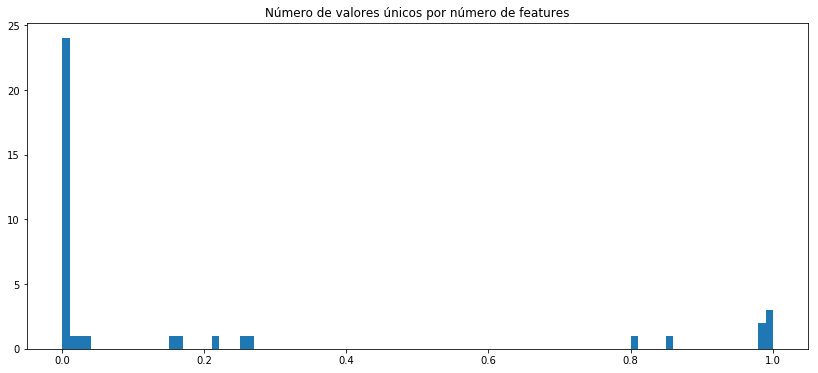

In [175]:
plt.figure(figsize=(14,6))
plt.title('Número de valores únicos por número de features')
_ = plt.hist(nunique.astype(float)/df.shape[0], bins=100)


In [179]:
result = df[df['Weekday'].isnull()]['Data']

In [180]:
result # No complete timestamp

ID
fde5cbd1   -9223372036854775808
e27cdd32   -9223372036854775808
e1660926   -9223372036854775808
Name: Data, dtype: int64

In [181]:
df.to_csv('final_dataset.csv')

In [182]:
df.to_pickle('final.p')


In [183]:
df = pd.read_pickle('final.p')